### Détails du projet

Le but du projet est de collecter les données financiere du prix des actions par api et après avoir collecté ces données, nous les visualiserons dans un tableau de bord afin d'identifier des modèles ou des tendances. Les actions sur lesquelles nous travaillerons sont Tesla, Amazon, AMD et GameStop.

Nous allons extraire les données des action en utilisant `ifynance` une librairie python. `ifynance` est un wrapper qui permet d'utiliser l'api de [yahoofinance.com](yahoofinance.com)

# Collecte des données

In [59]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

La méthode `Ticker()` permet d’obtenir des données de marché pour un symbole données

In [4]:
apple = yf.Ticker("AAPL")

In [ ]:
apple.info # get stock info

In [66]:
## Obtenir les prix de trade dans une période données
apple_data = apple.history(period = "max") # period = max downoad the maximum data available
apple_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600,0.0,0.0


In [67]:
apple_data.reset_index(inplace=True)
apple_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
11078,2024-11-21 00:00:00-05:00,228.880005,230.160004,225.710007,228.520004,42108300,0.0,0.0
11079,2024-11-22 00:00:00-05:00,228.059998,230.720001,228.059998,229.869995,38168300,0.0,0.0
11080,2024-11-25 00:00:00-05:00,231.460007,233.250000,229.740005,232.869995,90152800,0.0,0.0
11081,2024-11-26 00:00:00-05:00,233.330002,235.570007,233.330002,235.059998,45986200,0.0,0.0
11082,2024-11-27 00:00:00-05:00,234.470001,235.690002,233.809998,234.929993,33498400,0.0,0.0


## Visualisation des données

<Axes: xlabel='Date'>

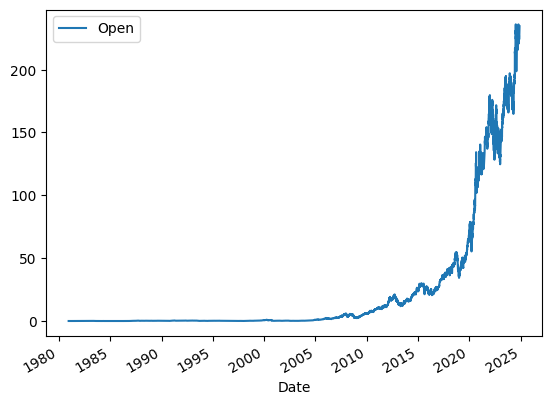

In [12]:
apple_data.plot(x = 'Date',y = 'Open')

### Extracting dividends

In [13]:
apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2023-11-10 00:00:00-05:00    0.240000
2024-02-09 00:00:00-05:00    0.240000
2024-05-10 00:00:00-04:00    0.250000
2024-08-12 00:00:00-04:00    0.250000
2024-11-08 00:00:00-05:00    0.250000
Name: Dividends, Length: 85, dtype: float64

<Axes: xlabel='Date'>

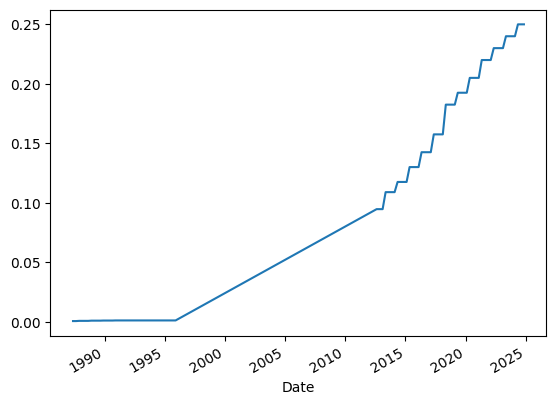

In [14]:
apple.dividends.plot()

# Second method: Using web scraping

In [15]:
import requests
from bs4 import BeautifulSoup

In [26]:
url = 'https://finance.yahoo.com/quote/AAPL/history/'

In [34]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36 Edg/131.0.0.0"
}
response = requests.get(url,headers=headers)
if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
    print(soup.prettify())
else:
    print("Failed to retrieve the webpage. Status code: ", response.status_code)


<!DOCTYPE html>
<html class="desktop neo-green dock-upscale" data-color-scheme="light" lang="en-US" theme="light">
 <head>
  <meta charset="utf-8"/>
  <meta content="guce.yahoo.com" name="oath:guce:consent-host"/>
  <link crossorigin="anonymous" href="//s.yimg.com" rel="preconnect"/>
  <link href="//geo.yahoo.com" rel="preconnect">
   <link href="//query1.finance.yahoo.com" rel="preconnect"/>
   <link href="//query2.finance.yahoo.com" rel="preconnect"/>
   <link href="//consent.cmp.oath.com" rel="preconnect"/>
   <link as="worker" href="/__rapidworker-1.2.js" rel="preload"/>
   <link href="https://s.yimg.com/uc/finance/webcore/js/_staticFinProtobuf.4b1559b8e4645fd93a12.js" rel="preconnect"/>
   <link href="https://cdn.jsdelivr.net/npm/protobufjs@7.1.2/dist/minimal/protobuf.min.js" rel="preconnect"/>
   <script>
    window.finNeoPageStart = Date.now();
   </script>
   <script>
    (function(){if(!window.YAHOO){window.YAHOO={}}; window.YAHOO.context={"consent":{"allowContentPersonalizati

In [19]:
apple_data2 = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

In [63]:
long = []
for row in soup.find('table',{"class": "table yf-j5d1ld noDl"}).find('tbody').find_all('tr'):
    col = row.find_all('td')
    if len(col) ==7:
        date = col[0].text
        Open = col[1].text
        high = col[2].text
        low = col[3].text
        close = col[4].text
        adj_close = col[5].text
        volume = col[6].text
        apple_data2 = pd.concat([apple_data2,pd.DataFrame({"Date":[date], "Open":[Open], "High":[high], "Low":[low], "Close":[close], 
                                                                 "Adj Close":[adj_close], "Volume":[volume]})], ignore_index=True)    
    else:
        continue
    

In [64]:
apple_data2.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Nov 27, 2024",234.47,235.69,233.81,234.93,"33,498,400",234.93
1,"Nov 26, 2024",233.33,235.57,233.33,235.06,"45,986,200",235.06
2,"Nov 25, 2024",231.46,233.25,229.74,232.87,"90,152,800",232.87
3,"Nov 22, 2024",228.06,230.72,228.06,229.87,"38,168,300",229.87
4,"Nov 21, 2024",228.88,230.16,225.71,228.52,"42,108,300",228.52


In [69]:
apple_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       279 non-null    object
 1   Open       279 non-null    object
 2   High       279 non-null    object
 3   Low        279 non-null    object
 4   Close      279 non-null    object
 5   Volume     279 non-null    object
 6   Adj Close  279 non-null    object
dtypes: object(7)
memory usage: 15.4+ KB
